In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv ('historical_data_final.csv')
df.columns = ['datetime', 'temperature', 'wind_speed', 'surface_solar_radiation', 'relative_humidity', 'surface_pressure', 'total_precipitation', 'latitude', 'longitude', 'event_id']

''' Occurances Per State
AL    21\nMS    21\nOK    11\nTN    10\nMN     7\nNE     6\nIL     5\nKS     4\nIN     4\nND     3\nMO     3\nTX     3\nIA     3\nSD     2\nOH     2\nAR     2\nSC     1\nLA     1\nGA     1\nKY     1 '''

# temp = df
# temp['outcome'] = 1.0

# X = temp[['Weight', 'Volume']]
# y = df['outcome']

# regr = linear_model.LinearRegression()
# regr.fit(X, y)

# #predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
# predictedCO2 = regr.predict([[2300, 1300]])

# print(predictedCO2)ed', 'relative_humidity', 'total_precipitation']]
# y = df['outcome']

# regr = linear_model.LinearRegression()
# regr.fit(X, y)

# #predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
# predictedCO2 = regr.predict([[5.0, 1.3, 0.4, 0]])

# print(predictedCO2)

' Occurances Per State\nAL    21\nMS    21\nOK    11\nTN    10\nMN     7\nNE     6\nIL     5\nKS     4\nIN     4\nND     3\nMO     3\nTX     3\nIA     3\nSD     2\nOH     2\nAR     2\nSC     1\nLA     1\nGA     1\nKY     1 '

In [5]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model


In [24]:
temp = df
averages = temp.groupby('event_id').mean()

In [25]:
averages

,temperature,wind_speed,surface_solar_radiation,relative_humidity,surface_pressure,total_precipitation,latitude,longitude,outcome
event_id,,,,,,,,,
220277,13.184912,2.531754,205.333333,0.620702,98333.894737,0.232281,34.2203,-85.9602,1.0
224551,15.680000,2.803333,218.491228,0.604035,100982.754386,0.096491,32.7003,-90.6783,1.0
224552,15.002807,2.633333,216.771930,0.630702,100649.614035,0.110351,32.9456,-90.1539,1.0
231404,16.605965,3.691579,227.578947,0.634912,96884.789474,0.223333,43.5755,-93.6404,1.0
231939,15.688246,4.184912,232.666667,0.586667,97151.333333,0.086140,35.3770,-97.3050,1.0
...,...,...,...,...,...,...,...,...,...
899721,19.040877,2.532456,190.807018,0.698421,100785.789474,0.167895,31.0750,-89.9209,1.0
902831,17.984211,2.607368,172.807018,0.704386,100628.000000,0.264737,31.4641,-89.7579,1.0
902837,17.927895,2.602456,172.175439,0.701404,100629.894737,0.256842,31.5475,-89.6194,1.0


In [7]:
def random_dates2(start, end, n, unit='D', seed=None):
    if not seed:  # from piR's answer
        np.random.seed(0)

    ndays = (end - start).days + 1
    return start + pd.to_timedelta(
        np.random.randint(0, ndays, n), unit=unit
    )
start = pd.to_datetime('2010-01-01')
end = pd.to_datetime('2020-12-30')
dates = random_dates2(start, end, 115)


In [8]:
import requests
from datetime import timedelta
import json
from itertools import islice

'''
Formatting:
'start': '2010-01-01',
'end': '2018-12-31',
'''
frames = []
cities = ['Birmingham', 'Minneapolis', 'Oklahoma City', 'Nashville', 'Minneapolis', 'Omaha', 'Chicago']
for index in range(30,110):
    end_date = dates[index]
    begin_date = end_date - timedelta(weeks=8)
    city = cities[index%6]
    r = requests.get('https://api.oikolab.com/weather',
                     params={'param': ['temperature', 'wind_speed', 'surface_solar_radiation', 'relative_humidity', 'surface_pressure', 'total_precipitation'],
                             'start': begin_date,
                             'end': end_date,
                             'freq': 'D',
                             'location': city,
                             'api-key': 'b03998e660494c2e8165d41369c13248'}
                     )
    w_data = json.loads(r.json()['data'])
    history_df = pd.DataFrame(index=pd.to_datetime(w_data['index'], 
                                       unit='s'),
                  data=w_data['data'],
                  columns=w_data['columns'])
    history_df['city'] = city
    history_df['event_id'] = index
    frames.append(history_df)
result = pd.concat(frames)
result.index.name = 'datetime'
# result.to_csv("historical_data_non_tornado.csv", encoding='utf-8')


In [9]:
result.columns = ['temperature', 'wind_speed', 'surface_solar_radiation', 'relative_humidity', 'surface_pressure', 'total_precipitation', 'city', 'event_id']
result['latitude'] = np.nan
result['longitude'] = np.nan
result.head()


,temperature,wind_speed,surface_solar_radiation,relative_humidity,surface_pressure,total_precipitation,city,event_id,latitude,longitude
datetime,,,,,,,,,,
2017-08-01,15.75,4.20,240,0.76,100034.30,0.09,Birmingham,30,NaN,NaN
2017-08-02,16.23,5.46,51,0.89,99606.66,0.20,Birmingham,30,NaN,NaN
2017-08-03,16.51,6.69,147,0.81,99133.37,0.06,Birmingham,30,NaN,NaN
2017-08-04,16.66,3.79,223,0.69,99747.34,0.03,Birmingham,30,NaN,NaN
2017-08-05,14.41,2.66,231,0.75,100415.68,0.21,Birmingham,30,NaN,NaN


In [28]:
df_2 = pd.read_csv ('random_weather.csv')
new_res = df_2.groupby('event_id').mean()

In [29]:
new_res

,Unnamed: 0,temperature,wind_speed,surface_solar_radiation,relative_humidity,surface_pressure,total_precipitation,latitude,longitude,outcome
event_id,,,,,,,,,,
0,28.0,14.854561,3.716667,196.385965,0.744561,100252.754386,0.086842,NaN,NaN,0.0
1,85.0,-4.313333,3.115439,82.368421,0.736667,98170.859649,0.052807,NaN,NaN,0.0
2,142.0,25.597895,3.943509,273.333333,0.636316,97057.245614,0.139649,NaN,NaN,0.0
3,199.0,8.601228,2.650702,95.175439,0.743684,99623.070175,0.186316,NaN,NaN,0.0
4,256.0,7.313684,3.422105,157.105263,0.645789,97995.701754,0.175088,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
105,4303.0,11.381930,2.597018,129.877193,0.646140,99670.445965,0.043158,NaN,NaN,0.0
106,4360.0,18.457895,2.623158,196.543860,0.631930,98323.485965,0.037368,NaN,NaN,0.0
107,4417.0,23.919123,2.375439,265.701754,0.725263,97291.801228,0.200175,NaN,NaN,0.0


In [20]:
new_res.to_csv('random_weather.csv')

In [21]:
from sklearn import linear_model
df['outcome'] = 1.0
result_fin = pd.concat([new_res,df])
averages = result_fin.groupby('event_id').mean()
averages


,temperature,wind_speed,surface_solar_radiation,relative_humidity,surface_pressure,total_precipitation,latitude,longitude,outcome
event_id,,,,,,,,,
0,14.854561,3.716667,196.385965,0.744561,100252.754386,0.086842,NaN,NaN,0.0
1,-4.313333,3.115439,82.368421,0.736667,98170.859649,0.052807,NaN,NaN,0.0
2,25.597895,3.943509,273.333333,0.636316,97057.245614,0.139649,NaN,NaN,0.0
3,8.601228,2.650702,95.175439,0.743684,99623.070175,0.186316,NaN,NaN,0.0
4,7.313684,3.422105,157.105263,0.645789,97995.701754,0.175088,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...
899721,19.040877,2.532456,190.807018,0.698421,100785.789474,0.167895,31.0750,-89.9209,1.0
902831,17.984211,2.607368,172.807018,0.704386,100628.000000,0.264737,31.4641,-89.7579,1.0
902837,17.927895,2.602456,172.175439,0.701404,100629.894737,0.256842,31.5475,-89.6194,1.0


In [23]:
result_fin.to_csv('all_weather.csv')

In [22]:
X = averages[['temperature','wind_speed','surface_solar_radiation','relative_humidity', 'total_precipitation']]
y = averages['outcome']

regr = linear_model.LinearRegression()
regr.fit(X, y)
print(regr.predict([[17.0, 2.6, 170, 0.6, 0.3]]))

[1.06287339]


In [74]:

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [78]:
averages.groupby('outcome').mean()
result.groupby('event_id')['wind_speed'].describe()

,temperature,wind_speed,surface_solar_radiation,relative_humidity,surface_pressure,total_precipitation,latitude,longitude
outcome,,,,,,,,
0.0,12.285520,3.215456,159.515205,0.689415,98458.256140,0.106327,NaN,NaN
1.0,14.709056,3.190515,193.246246,0.655581,98427.055793,0.227149,36.766569,-90.978573


In [104]:
data = pd.read_csv ('test.csv',header=None)
#Take data to numPy
numData = data.to_numpy()
#Returns all elements of all Tornadoes for a specific field (0-8)
def getAllDataByField(field): 
    
    return numData[1:,field:field+1]

#Returns elements of a given field (0-8) for a particular Tornado (0-107)
def getDataByFieldAndIndex(field, event):
    
    return numData[1+(NUMBER_DAYS*event):(NUMBER_DAYS*(event+1)+1),field:field+1]

In [106]:
arr2d = np.reshape(getAllDataByField(1), (-1, 57)).astype(np.float)
arrmean = np.mean(arr2d,axis=0)
arrmean

array([12.631     , 12.24933333, 12.44333333, 12.174     , 12.52833333,
       13.04766667, 13.16166667, 13.79833333, 13.36966667, 12.893     ,
       12.72966667, 13.011     , 12.88033333, 12.25933333, 12.612     ,
       12.84066667, 12.72766667, 12.04      , 10.88166667, 11.19466667,
       11.86033333, 11.84266667, 12.082     , 12.38866667, 12.71866667,
       12.24166667, 12.30766667, 12.50433333, 12.558     , 13.22466667,
       12.362     , 12.214     , 11.905     , 11.07866667, 10.87766667,
       11.135     , 11.23133333, 11.343     , 10.269     , 10.46166667,
       11.153     , 11.53833333, 12.26333333, 12.26066667, 12.02266667,
       12.103     , 13.191     , 12.60933333, 12.88766667, 12.70166667,
       12.34266667, 12.68166667, 12.379     , 12.00566667, 12.52966667,
       12.58833333, 14.93766667])

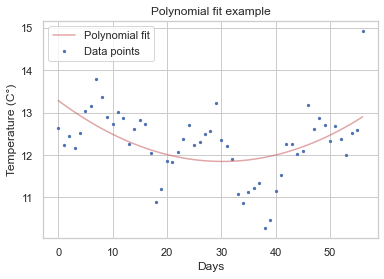

In [107]:
x = np.arange(57)
y = arrmean

#Polynomial Fit
fit = np.polyfit(x, y, 2)
a = fit[0]
b = fit[1]
c = fit[2]
fit_equation = a * np.square(x) + b * x + c
#Plotting
fig1 = plt.figure()
ax1 = fig1.subplots()
ax1.plot(x, fit_equation,color = 'r',alpha = 0.5, label = 'Polynomial fit')
ax1.scatter(x, y, s = 5, color = 'b', label = 'Data points')
ax1.set_title('Polynomial fit example')
plt.ylabel("Temperature (C°)")
plt.xlabel("Days")
ax1.legend()
plt.show()